# Red Wine Draft 15

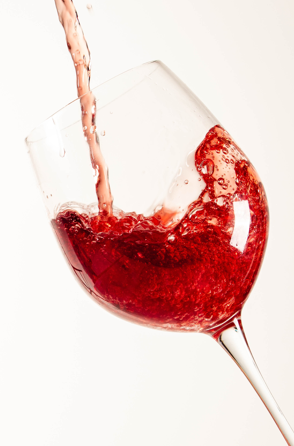

<center>Photo by <a href="https://unsplash.com/@maxtutakphotography?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Max Tutak</a> on <a href="https://unsplash.com/s/photos/wine?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a></center>

# Introduction

Red wine is an alcoholic beverage made by fermenting the juice of dark-skinned grapes. Red wine differs from white wine in its base material and production process. Red wine is made with dark-skinned rather than light-skinned grapes. During red wine production, the winemaker allows pressed grape juice, called must, to macerate and ferment with the dark grape skins, which adds color, flavor and tannin to the wine. Alcohol occurs when yeast converts grape sugar into ethanol and carbon dioxide. The result of these processes: red wine.

Red wines have a range of flavors. Different grape varieties produce aromas of fruits, flowers, herbs, spices and earthy characteristics. For example, Pinot Noir tends to have raspberry, cherry and forest floor notes, while Cabernet Sauvignon generally boasts notes of cassis, licorice and wet gravel.

Acid is an essential component of wine; it serves as a preservative as well as provides freshness and structure. When tasting red wine, the acidity is perceived as the tart and sour attributes which balance against sweet and bitter or tannins components. 

The alcohol content usually ranges from 12–15%.

# Goal

Determine which physiochemical properties make a wine "good."

# Technical Requirements

1. Download the data.
2. Load data using SQLite and Pandas.
3. Perform exploratory data analysis.
4. Provide clear explanations. 
5. Provide suggestions about how the analysis can be improved.

# Standards

Below is a summary of the standards I followed to create this report. 

>* **Standard 1:** For parts of my analysis, I combined 4-star and 5-star rated reviews and counted them as positive. I combined 1-star and 2-star reviews and counted them as negative. I counted the 3-star reviews as neutral.
>* **Standard 2:** I did not analyze emojis.
>* **Standard 3:** I did not analyze non-English text.
>* **Standard 4:** I deleted rows with no review content.
>* **Standard 5:** I removed "no," and "not" from the list of standard stop words in the NLTK library.
>* **Standard 6:** I combined similar categories and made 25 categories from the original 110. The number of reviews in each of the 25 categories is different. 
>* **Standard 7:** 74,804 reviewers wrote more than one review for a podcast. I kept these reviews.
>* **Standard 8:** For the portion of the report that focuses on specific categories, I picked 3 categories with the most number of reviews: Comedy, Business, Society-Culture. 

# Biases

The biases below make the scope of conclusions gained from this report limited.

>* **Bias 1:** This report does not necessarily represent the opinions of the listener population, since those who wrote the reviews did so voluntarily and most of them gave a 5-star rating. An important question arises: What about those listeners who did not write any reviews? 
>* **Bias 2:** For parts of this report, I focused on three categories with the highest number of reviews: Comedy, Business, and Society-Culture.
>* **Bias 3:** I did not analyze emojis and the emotions expressed by the "emoji" people were ignored. 

# Libraries

In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sqlite3
import math


from IPython.display import display
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from scipy import stats

# Display Parameters

## Display Features

In [142]:
%matplotlib inline
pd.options.display.max_rows = 300000
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 500
pd.set_option("display.float_format", lambda x: "%.3f" % x)

## Colors

In [143]:
color_1 = "bisque"
color_2 = "crimson"
color_3 = "orangered"
color_4 = "lightcoral"
color_5 = "royalblue"
color_6 = "pink"
color_7 = "indianred"
color_8 = "slategrey"
color_9 = "salmon"

## Figure Parameters

In [144]:
size = 20

params = {
    "font.family": "Times New Roman",
    "font.size": size,
    "axes.labelsize": size,
    "xtick.labelsize": size * 0.75,
    "ytick.labelsize": size * 0.75,
    "figure.titlesize": size * 1.5,
    "axes.titlesize": size * 1.5,
    "axes.titlepad": size,
    "axes.labelpad": size - 10,
    "lines.linewidth": 2,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.spines.left": False,
    "axes.spines.bottom": False,
    "legend.fontsize": size,
}

# Load and Display Raw Data

In [145]:
redwine = pd.read_csv(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\RedWine\\DataSets\\winequality-red.csv",
    index_col=False,
)

In [146]:
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5
1,7.800,0.880,0.000,2.600,0.098,25.000,67.000,0.997,3.200,0.680,9.800,5
2,7.800,0.760,0.040,2.300,0.092,15.000,54.000,0.997,3.260,0.650,9.800,5
3,11.200,0.280,0.560,1.900,0.075,17.000,60.000,0.998,3.160,0.580,9.800,6
4,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5


# Datasets

I used 3 databases from Kaggle's Mental Health in the Tech Industry:

> **Survey:** Contains the year each survey was conducted. The year serves as the SurveyID. <br>
> **Question:** Contains 105 questions. Not all questions were used in all the years. Not all questions were given to every individual surveyed. Each question has a unique QuestionID.<br>
> **Answer:** Contains 236,898 answers. Participants generally answered more than one question. The answers are in a column called AnswerText.

## Wine Quality Datasets

In [147]:
three = redwine[redwine["quality"] == 3]

In [148]:
four = redwine[redwine["quality"] == 4]

In [149]:
five = redwine[redwine["quality"] == 5]

In [150]:
six = redwine[redwine["quality"] == 6]

In [151]:
seven = redwine[redwine["quality"] == 7]

In [152]:
eight = redwine[redwine["quality"] == 8]

### Section Summary
> * The original dataset contained 4 tables: Categories, Podcasts, Reviews, Runs.
> * The Runs table had no valuable information for this report. I deleted it.

# Exploratory Data Analysis

## Dimensions

In [153]:
redwine.shape

(1599, 12)

## Data Types

In [154]:
redwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Descriptive Statistics

In [155]:
redwine.describe(include="all").applymap("{:,.2f}".format)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,"1,599.00","1,599.00","1,599.00","1,599.00","1,599.00","1,599.00","1,599.00","1,599.00","1,599.00","1,599.00","1,599.00","1,599.00"
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


## Quality Column

In [156]:
redwine.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [157]:
quality_counts = redwine["quality"].value_counts()
quality_counts = quality_counts.to_frame()
quality_counts.index.names = ["Quality"]
quality_counts.rename(columns={"quality": "Count"}, inplace=True)
quality_counts = quality_counts.reset_index()

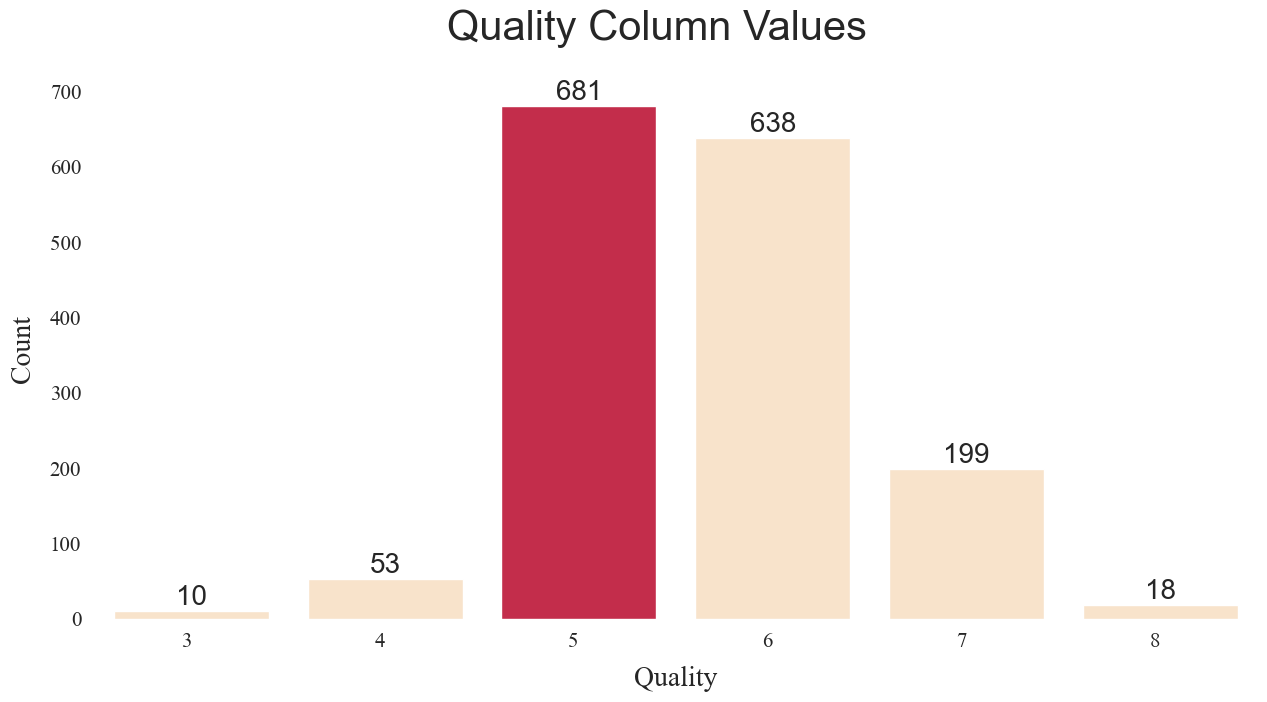

In [158]:
plt.rcParams.update(params)

fig, axes = plt.subplots(1, 1, figsize=(15, 7))
sns.set(style="white")

chart = sns.barplot(
    ax=axes,
    x="Quality",
    y="Count",
    data=quality_counts,
    errorbar=None,
    palette=[color_1 if x != 7 else color_2 for x in quality_counts["Quality"]],
)

chart.bar_label(chart.containers[0], size=size)

plt.xlabel("Quality")
plt.ylabel("Count")
plt.xticks()
plt.yticks()

chart.set_xticklabels(chart.get_xticklabels(), horizontalalignment="right")
plt.suptitle("Quality Column Values")

plt.show()

### Section Summary
> * The original dataset contained 4 tables: Categories, Podcasts, Reviews, Runs.
> * The Runs table had no valuable information for this report. I deleted it.

# Hypothesis Tests

In addition to my general analysis, I tested the following hypotheses.

## Helper Functions

### Two-Tailed Z-Test

In [159]:
def two_tailed_z_test(sample_mean, sample_size, pop_mean, pop_std, critical_value):
    """
    Determines if the mean of a sample is significanlty different than the mean of a population.
    """

    result = (sample_mean - pop_mean) / (pop_std / math.sqrt(sample_size))
    if result < critical_value:
        print("Failed to reject the null hypothesis.")
    else:
        print("Null hypothesis is rejected.")

### Two-Sample T-Test

In [160]:
def two_sample_t_test(sample1, sample2, variance):
    """
    Determines if the means of two samples are significanlty different.
    """

    if variance is False:
        print("The variance of the samples are different.")
    else:
        print("The variance of the samples are the same.")

    result = stats.ttest_ind(sample1, sample2, equal_var=variance)

    if result.pvalue < 0.05:
        print("Null hypothesis is rejected.")
    else:
        print("Failed to reject the null hypothesis.")

## Hypothesis 1

**Null**: There is no significant difference between the mean fixed acidity of wines with qualilty 3 and the mean fixed acidity of all wines in the database. <BR>
**Alternative**: The mean fixed acidity of wines with qualilty 3 is significantly different than the mean fixed acidity of all wines in the database.

In [161]:
l = [3]

two_tailed_z_test(
    np.average(three["fixed acidity"]),
    three.shape[0],
    redwine["fixed acidity"].agg([np.mean]).item(),
    redwine[~redwine.quality.isin(l)]["fixed acidity"].agg([np.std]).item(),
    1.960,
)

Failed to reject the null hypothesis.


### Section Summary
> * The original dataset contained 4 tables: Categories, Podcasts, Reviews, Runs.
> * The Runs table had no valuable information for this report. I deleted it.

## Hypothesis 2

**Null**: The mean free sulfur dioxide of Quality 3 wines is significantly different than the mean free sulfur dioxide of Quality 8 wines. <BR>
**Alternative**: There is no significant difference between the mean free sulfur dioxide of Quality 3 wines and the mean free sulfur dioxide of Quality 8 wines.

In [162]:
three_sample = three
eight_sample = eight

In [163]:
var_three_sample = np.var(three_sample["free sulfur dioxide"])
var_eight_sample = np.var(eight_sample["free sulfur dioxide"])

if var_three_sample == var_eight_sample:
    variance = True
else:
    variance = False

In [164]:
two_sample_t_test(
    three_sample["free sulfur dioxide"], eight_sample["free sulfur dioxide"], variance
)

The variance of the samples are different.
Failed to reject the null hypothesis.


### Section Summary
> * The original dataset contained 4 tables: Categories, Podcasts, Reviews, Runs.
> * The Runs table had no valuable information for this report. I deleted it.

## Hypothesis 3

**Null**: The mean pH of wines with alcohol content above 10 is significantly different than the mean pH of wines with alcohol content below 10. <BR>
**Alternative**: There is no significant difference between the mean pH of wines with alcohol content above 10 and the mean pH of wines with alcohol content below 10.

## Two-Sample T-Test

In [165]:
hi_alcohol = redwine.query("alcohol > 10")
lo_alcohol = redwine.query("alcohol < 10")

In [166]:
var_hi_alcohol = np.var(hi_alcohol["pH"])
var_lo_alcohol = np.var(lo_alcohol["pH"])

if var_hi_alcohol == var_lo_alcohol:
    variance = True
else:
    variance = False

In [167]:
two_sample_t_test(hi_alcohol["pH"], lo_alcohol["pH"], variance)

The variance of the samples are different.
Null hypothesis is rejected.


### Section Summary
> * I conducted a z-test to determine if there is a significant difference between the mean review length of a 5-star review and the mean review length of all reviews. The test determined with a 95% confidence level that there is not a significant difference between the text length of a 5-star rated review and all reviews. 
> * I conducted a t-test to determine if there is a significant difference between the mean star rating of the Comedy category and the business category. These are the top 2 categories in the dataset with the most number of reviews. This test determined with a 95% confidence level that there is a significant difference between the mean star rating of the Comedy category and the mean star rating of the Business category.

# Correlations

## Helper Functions

#### Create Heatmap

In [168]:
def create_heatmap(data, title):
    """
    Creates a Seaborn heatmap.
    """

    corr = data.corr()

    mask = np.triu(np.ones_like(corr, dtype=bool))

    f, ax = plt.subplots(figsize=(16, 16))

    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    heatmap = sns.heatmap(
        corr,
        mask=mask,
        cmap=cmap,
        vmax=1,
        vmin=-1,
        center=0,
        square=True,
        linewidths=0.5,
        cbar_kws={"shrink": 0.5},
        annot=True,
    )

    heatmap.set_title(
        title,
        fontdict={"fontsize": 16},
        pad=12,
    )
    plt.xlabel("")
    plt.ylabel("")

###  All Quality Categories

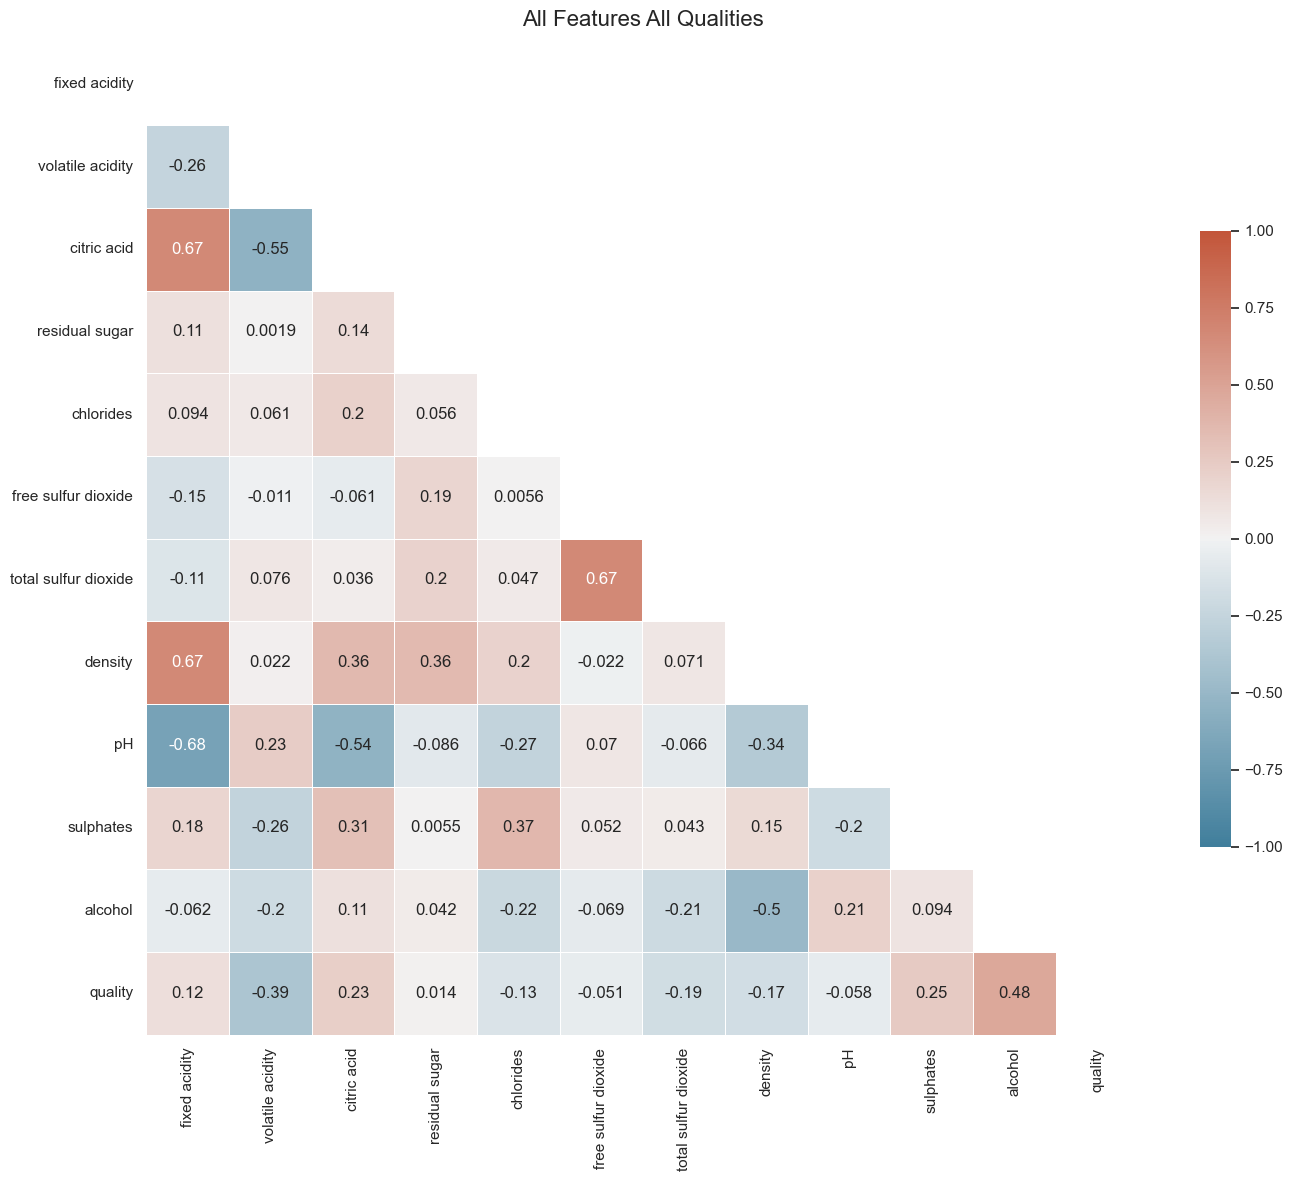

In [169]:
data = redwine
title = "All Features All Qualities"
create_heatmap(data, title)

### Section Summary
> * The original dataset contained 4 tables: Categories, Podcasts, Reviews, Runs.
> * The Runs table had no valuable information for this report. I deleted it.

### Quality 3 Category

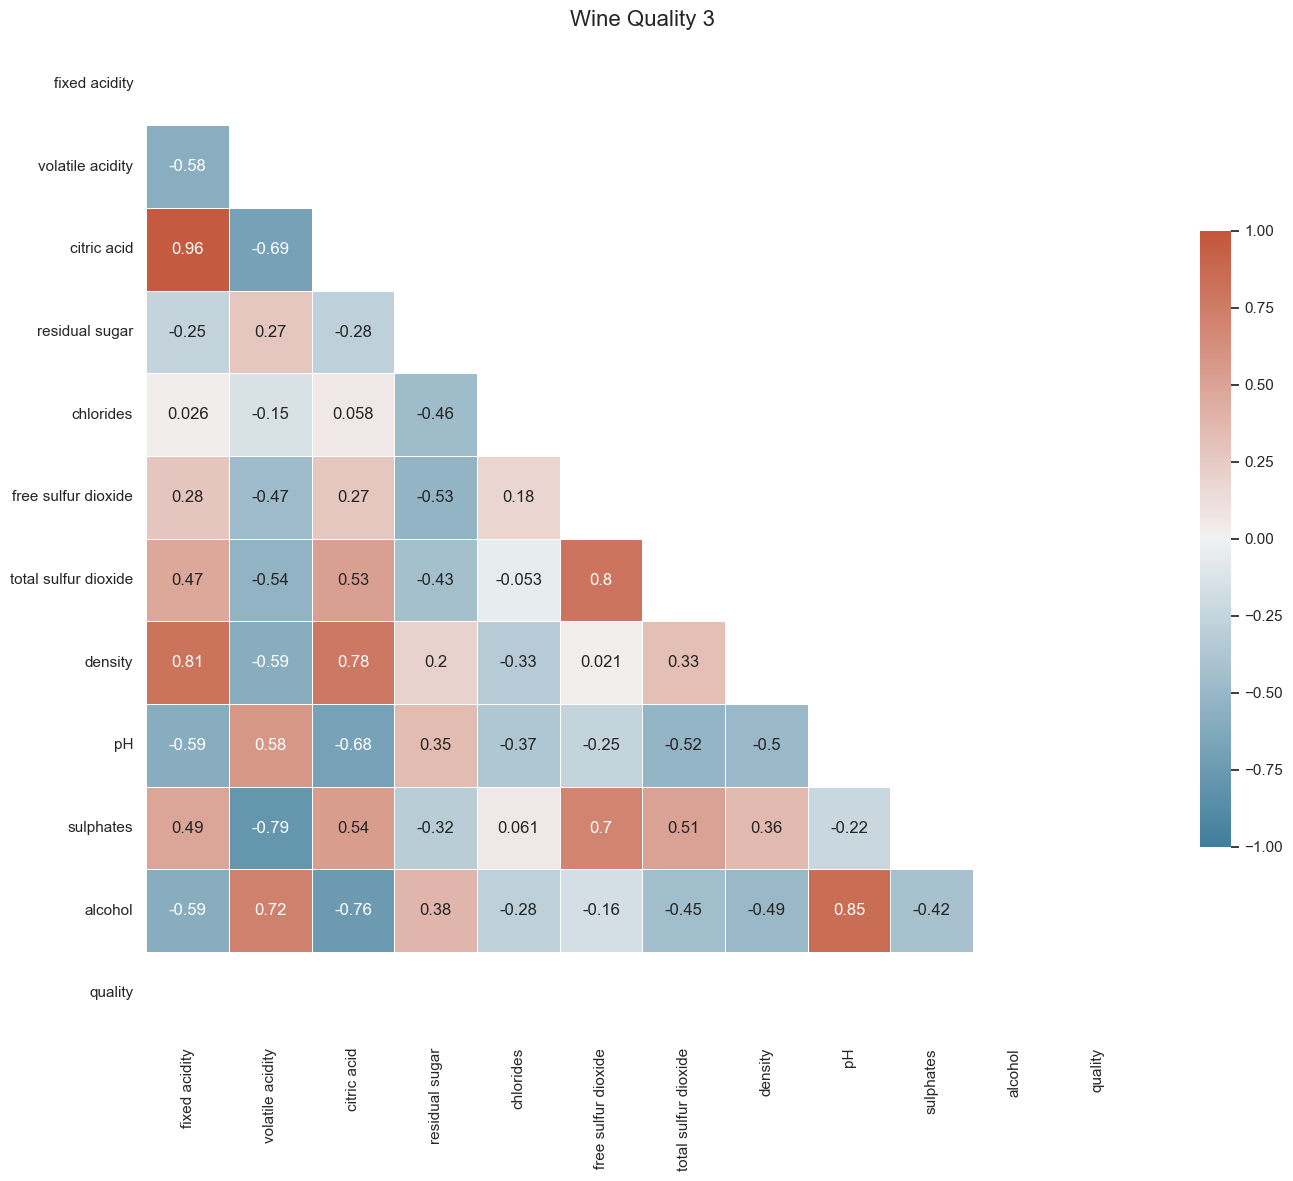

In [170]:
data = three
title = "Wine Quality 3"
create_heatmap(data, title)

### Quality 4 Category

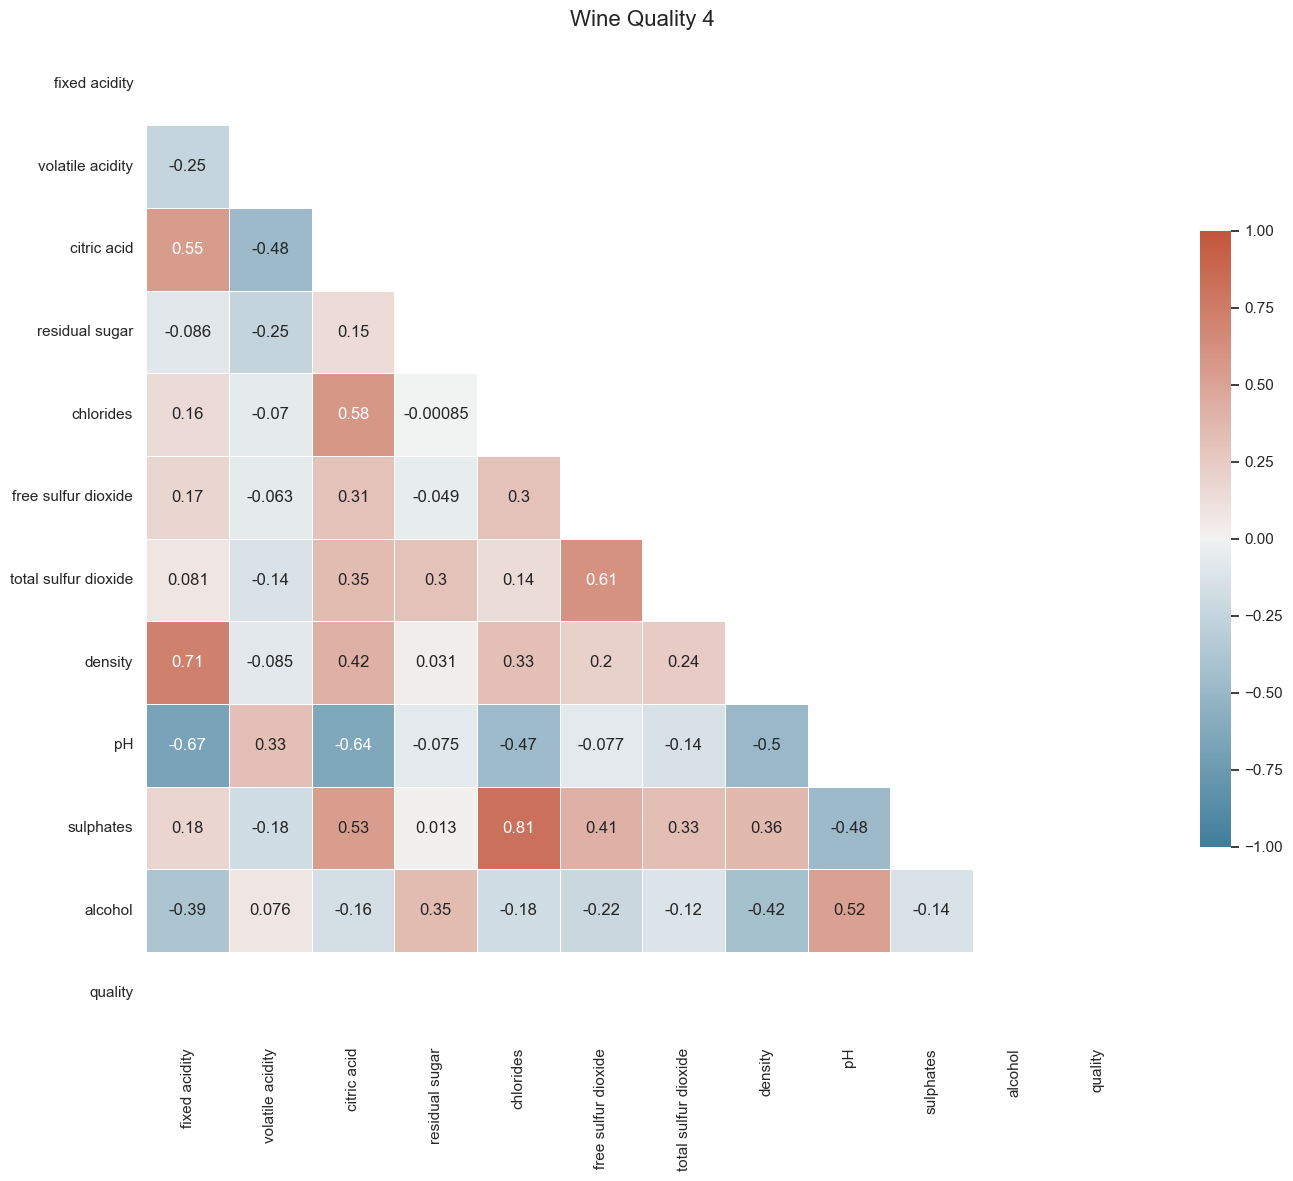

In [171]:
data = four
title = "Wine Quality 4"
create_heatmap(data, title)

### Section Summary
> * The original dataset contained 4 tables: Categories, Podcasts, Reviews, Runs.
> * The Runs table had no valuable information for this report. I deleted it.

### Quality 5 Category

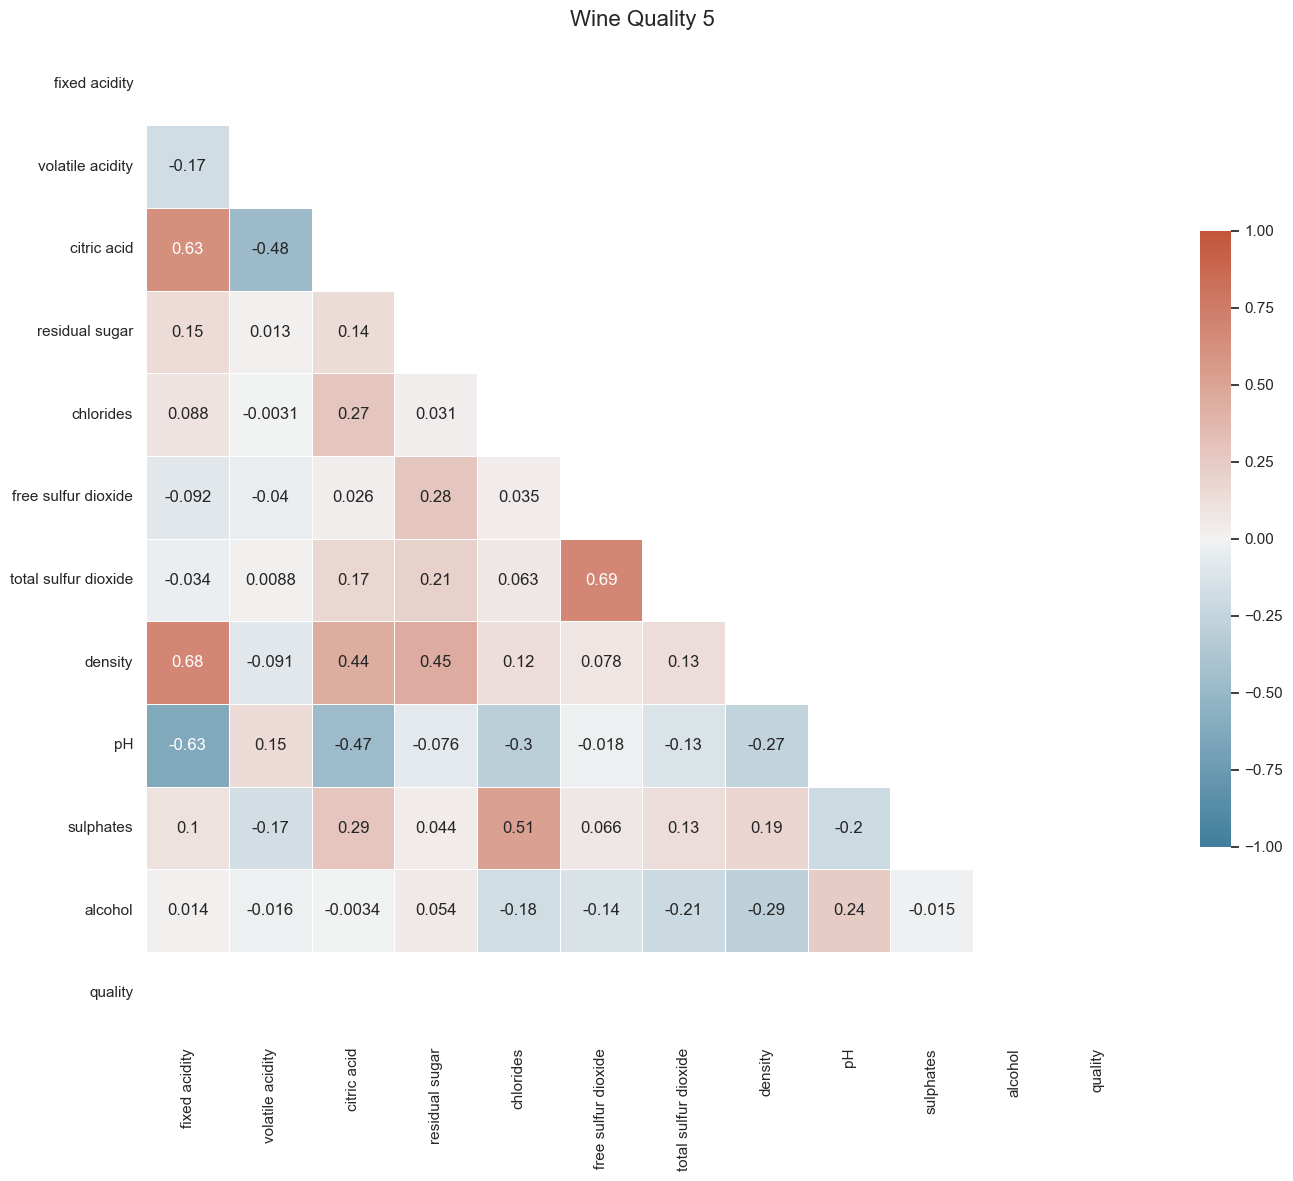

In [172]:
data = five
title = "Wine Quality 5"
create_heatmap(data, title)

### Section Summary
> * The original dataset contained 4 tables: Categories, Podcasts, Reviews, Runs.
> * The Runs table had no valuable information for this report. I deleted it.

### Quality 6 Category

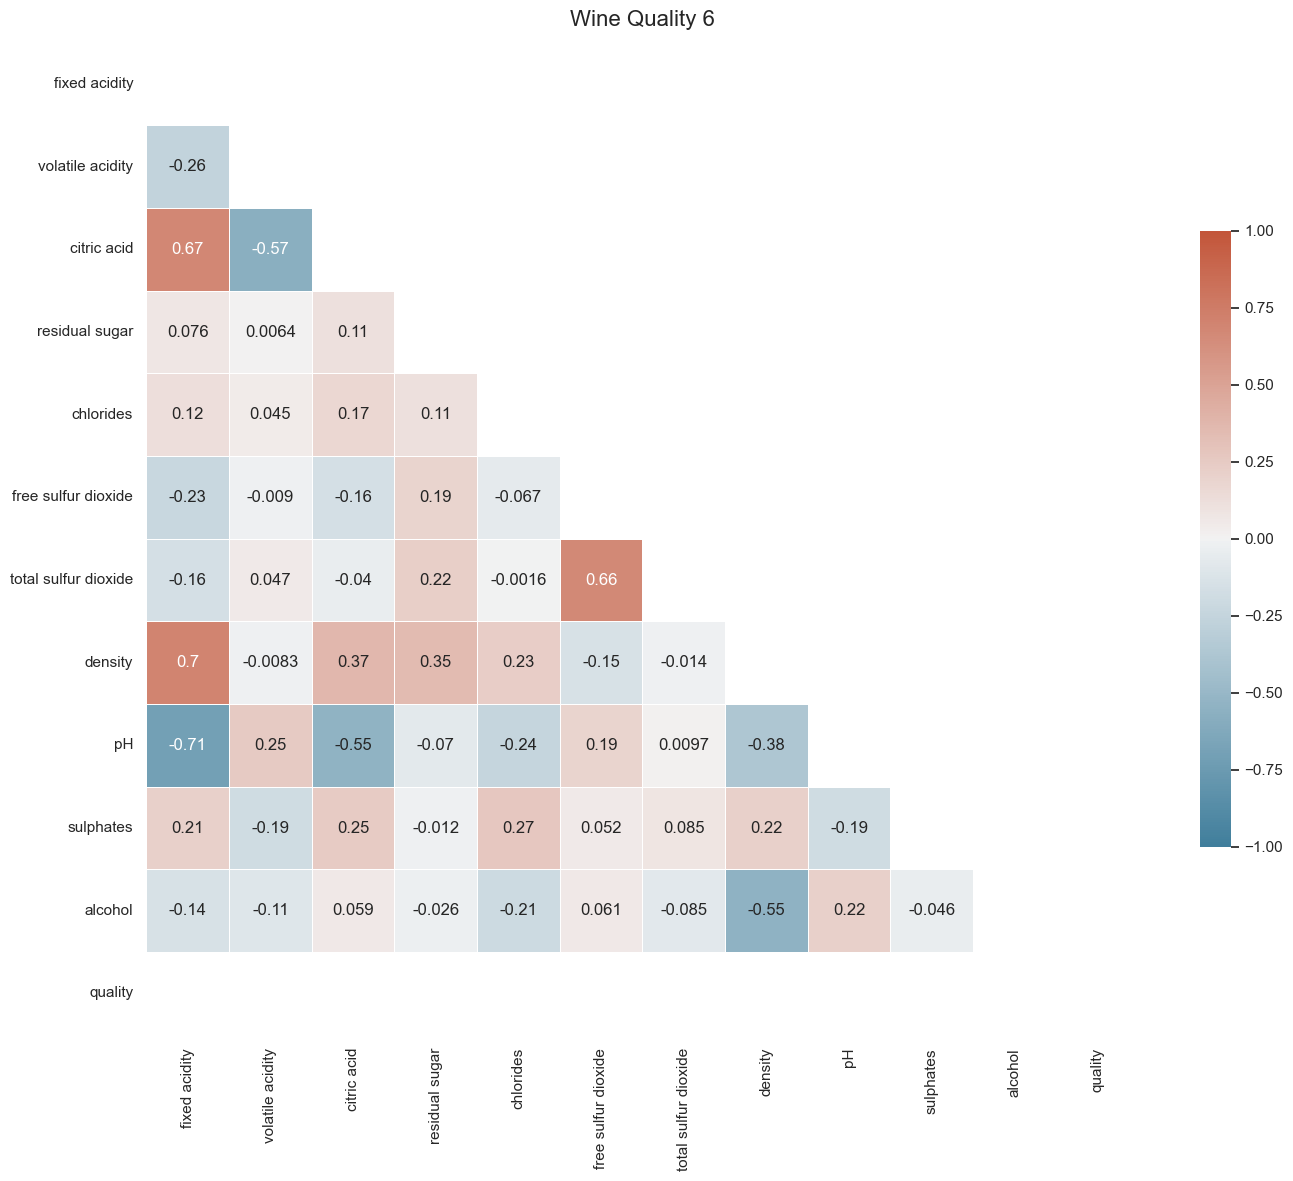

In [173]:
data = six
title = "Wine Quality 6"
create_heatmap(data, title)

### Section Summary
> * The original dataset contained 4 tables: Categories, Podcasts, Reviews, Runs.
> * The Runs table had no valuable information for this report. I deleted it.

### Quality 7 Category

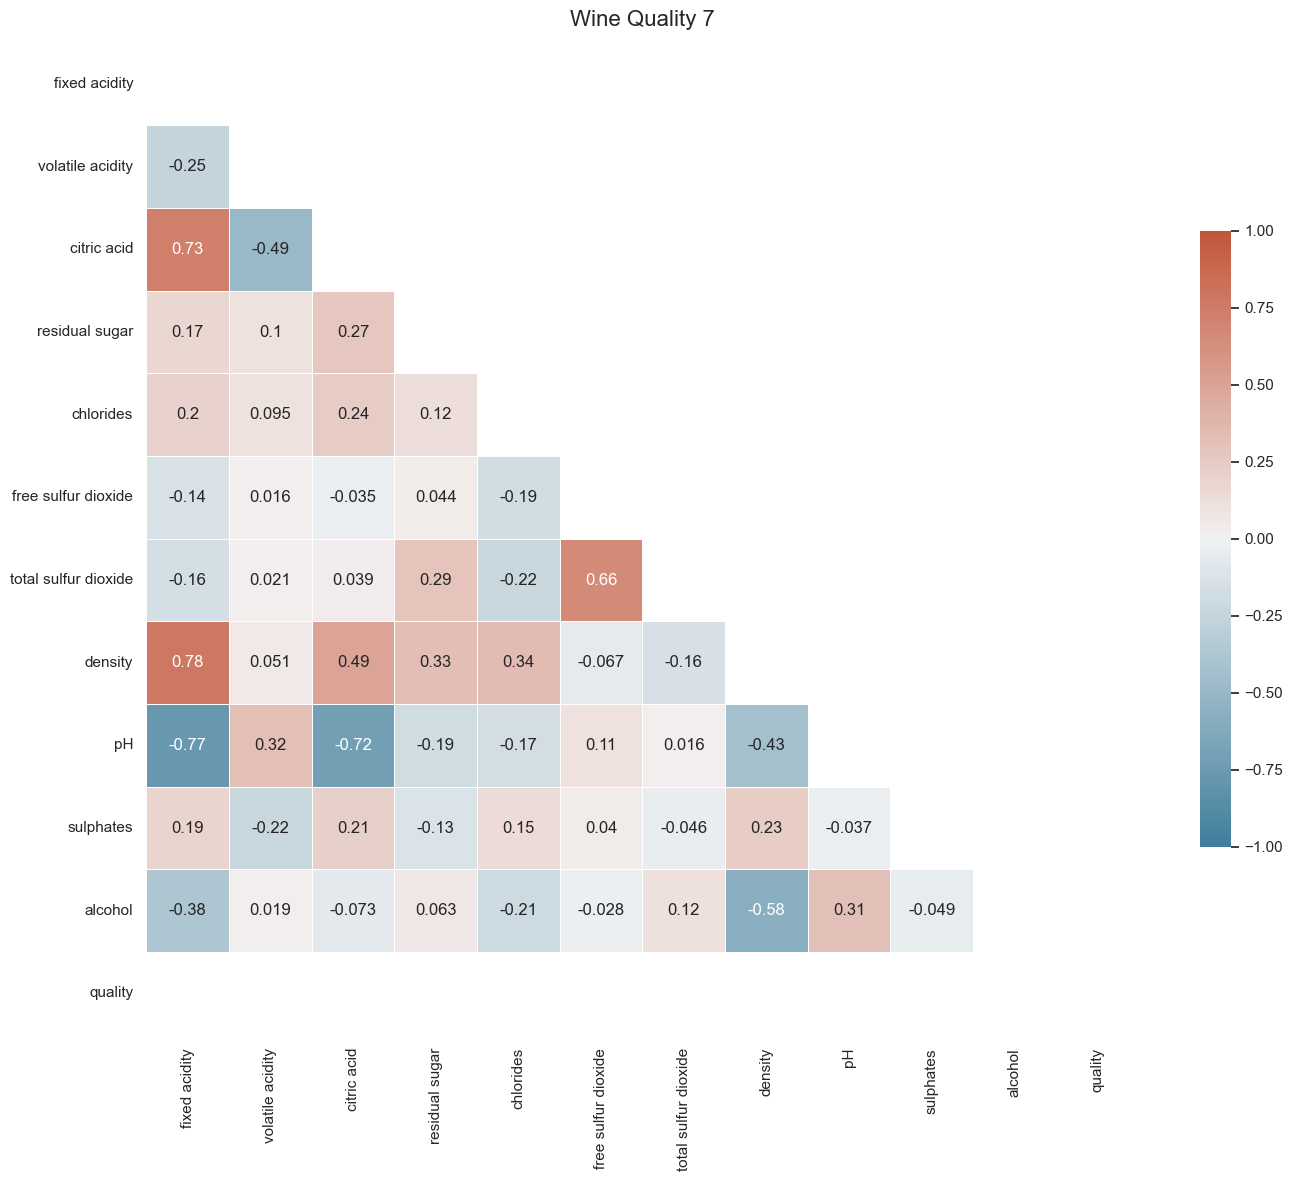

In [174]:
data = seven
title = "Wine Quality 7"
create_heatmap(data, title)

### Section Summary
> * The original dataset contained 4 tables: Categories, Podcasts, Reviews, Runs.
> * The Runs table had no valuable information for this report. I deleted it.

### Quality 8 Category

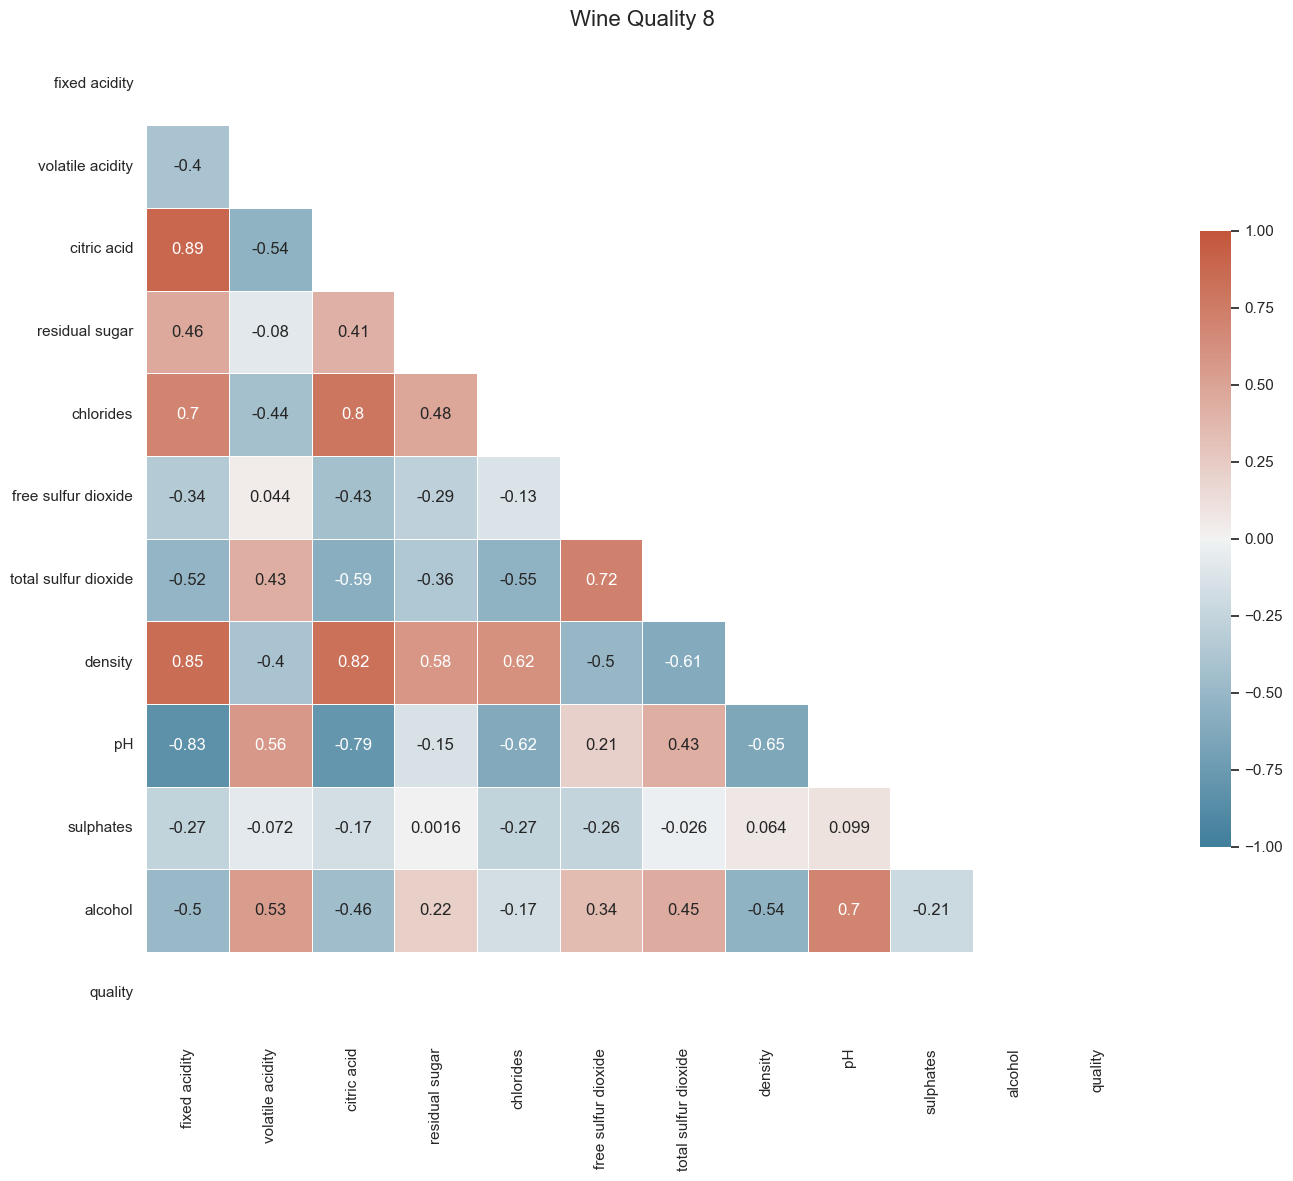

In [175]:
data = eight
title = "Wine Quality 8"
create_heatmap(data, title)

### Section Summary
> * The original dataset contained 4 tables: Categories, Podcasts, Reviews, Runs.
> * The Runs table had no valuable information for this report. I deleted it.

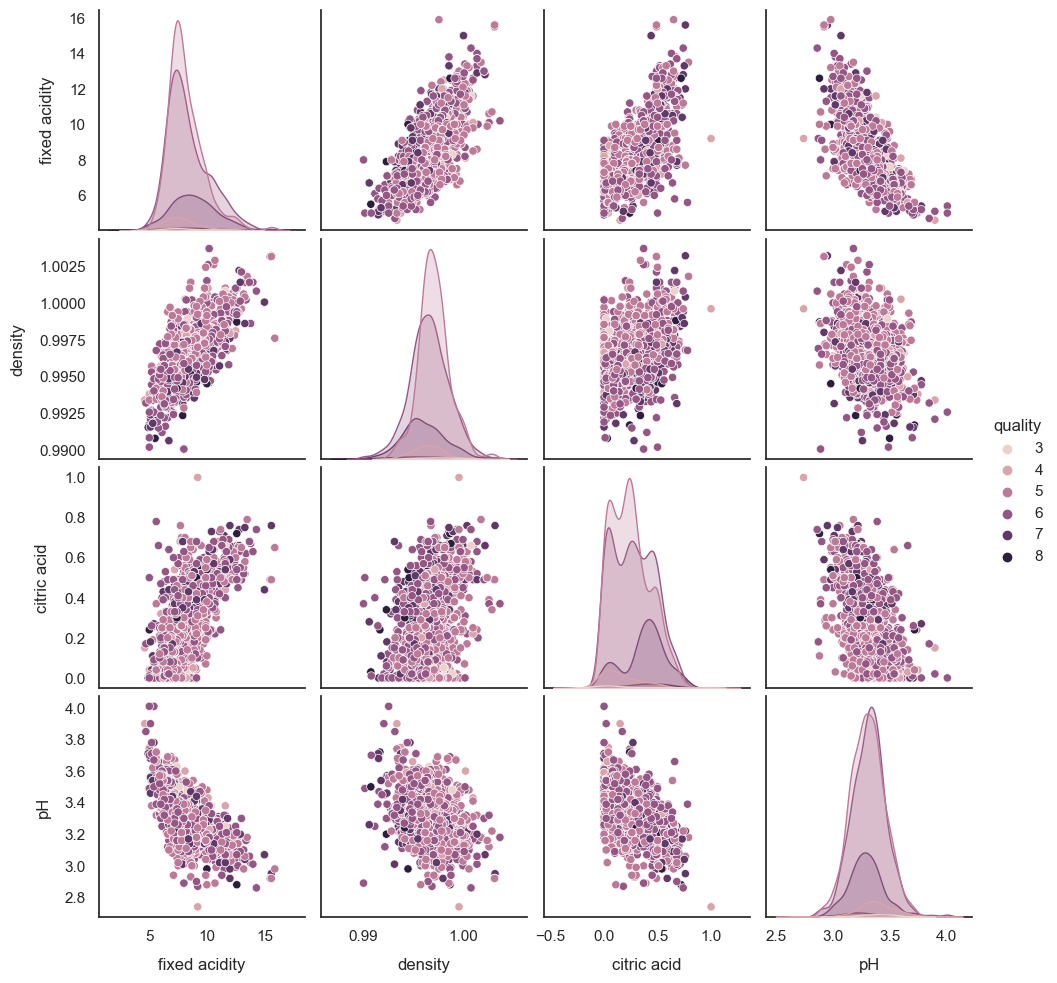

In [176]:
df = redwine[["fixed acidity", "density", "citric acid", "pH", "quality"]]
sns.pairplot(df, hue="quality")
plt.show()

# Two Groups

In [177]:
redwine["quality"] = redwine["quality"].replace([7, 8], 1)
redwine["quality"] = redwine["quality"].replace([3, 4, 5, 6, 7], 0)

# Data Normalization

In [178]:
scaler = MinMaxScaler()

scaled_redwine_logistic = scaler.fit_transform(redwine)
scaled_redwine_logistic = pd.DataFrame(
    scaled_redwine_logistic,
    columns=[
        "fixed acidity",
        "volatile acidity",
        "citric acid",
        "residual sugar",
        "chlorides",
        "free sulfur dioxide",
        "total sulfur dioxide",
        "density",
        "pH",
        "sulphates",
        "alcohol",
        "quality",
    ],
)

scaled_redwine_logistic.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.248,0.397,0.000,0.068,0.107,0.141,0.099,0.568,0.606,0.138,0.154,0.000
1,0.283,0.521,0.000,0.116,0.144,0.338,0.216,0.494,0.362,0.210,0.215,0.000
2,0.283,0.438,0.040,0.096,0.134,0.197,0.170,0.509,0.409,0.192,0.215,0.000
3,0.584,0.110,0.560,0.068,0.105,0.225,0.191,0.582,0.331,0.150,0.215,0.000
4,0.248,0.397,0.000,0.068,0.107,0.141,0.099,0.568,0.606,0.138,0.154,0.000


# Logistic Regression

# Helper Functions

### Feature Columns

In [179]:
def create_varialbles(data, indepdent_varialble, dependent_variable):
    """
    Creates independent and dependent variables.
    """

    X = data[indepdent_varialble]
    y = data[dependent_variable]

    return X, y

### Random Over Sampler

In [180]:
def random_oversampler(X, y):
    """
    Creates balanced samples of imbalanced data.
    """

    oversample = RandomOverSampler(sampling_strategy="minority")
    oversample = RandomOverSampler(sampling_strategy="auto")
    steps = [("over", RandomOverSampler()), ("model", LogisticRegression())]
    pipeline = Pipeline(steps=steps)
    X, y = oversample.fit_resample(X, y)

    return X, y

### Logistic Regression Model

In [181]:
def logistic_regression_model(X, y):
    """
    Creates logistic regression model.
    """

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, shuffle=True, test_size=0.4, random_state=0
    )
    log_model = LogisticRegression(solver="liblinear", random_state=None)
    log_model.fit(X_train, y_train)
    y_predict = log_model.predict(X_test)

    return log_model, X_test, y_test, y_predict

### Confusion Matrix

In [182]:
def print_confusion_matrix(y_test, y_predict):
    """
    Prints the confusion matrix
    """

    print(confusion_matrix(y_test, y_predict))

### Classification Report

In [183]:
def print_classification_report(y_test, y_predict):
    """
    Prints the classification report.
    """

    print(classification_report(y_test, y_predict))

### Receiver Operating Characteristic (ROC) Curve

In [184]:
def display_roc_curve(log_model, X_test, y_test, y_predict):
    """
    Displays the Receiver Operating Characteristic (ROC) Curve.
    """

    logit_roc_auc = roc_auc_score(y_test, y_predict)
    fpr, tpr, thresholds = roc_curve(y_test, log_model.predict_proba(X_test)[:, 1])

    plt.figure()
    plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc)
    plt.plot([0, 1], [0, 1], "r--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic")
    plt.legend(loc="lower right")
    plt.savefig("Log_ROC")

    plt.show()

### Section Summary
> * The original dataset contained 4 tables: Categories, Podcasts, Reviews, Runs.
> * The Runs table had no valuable information for this report. I deleted it.

## Citric Acid

In [185]:
data = scaled_redwine_logistic

indepdent_varialble = [
    "citric acid",
]

dependent_variable = "quality"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
X, y = random_oversampler(X, y)
log_model, X_test, y_test, y_predict = logistic_regression_model(X, y)

### Reports

In [186]:
print_confusion_matrix(y_test, y_predict)

[[344 222]
 [132 408]]


In [187]:
print_classification_report(y_test, y_predict)

              precision    recall  f1-score   support

         0.0       0.72      0.61      0.66       566
         1.0       0.65      0.76      0.70       540

    accuracy                           0.68      1106
   macro avg       0.69      0.68      0.68      1106
weighted avg       0.69      0.68      0.68      1106



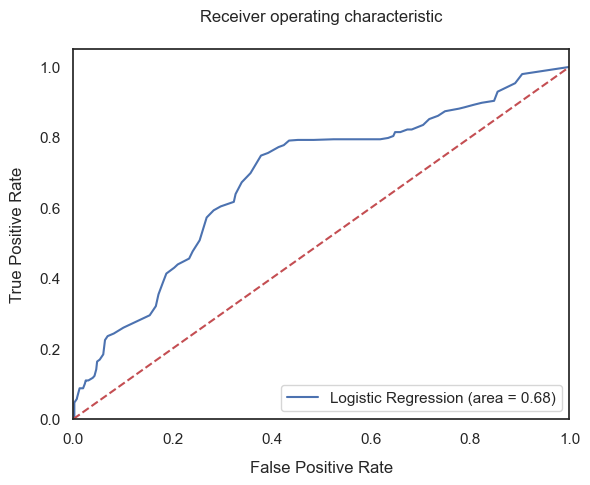

In [188]:
display_roc_curve(log_model, X_test, y_test, y_predict)

### Section Summary
> * The original dataset contained 4 tables: Categories, Podcasts, Reviews, Runs.
> * The Runs table had no valuable information for this report. I deleted it.

## Density


In [189]:
data = scaled_redwine_logistic

indepdent_varialble = [
    "density",
]

dependent_variable = "quality"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
X, y = random_oversampler(X, y)
log_model, X_test, y_test, y_predict = logistic_regression_model(X, y)

### Reports

In [190]:
print_confusion_matrix(y_test, y_predict)

[[322 244]
 [223 317]]


In [191]:
print_classification_report(y_test, y_predict)

              precision    recall  f1-score   support

         0.0       0.59      0.57      0.58       566
         1.0       0.57      0.59      0.58       540

    accuracy                           0.58      1106
   macro avg       0.58      0.58      0.58      1106
weighted avg       0.58      0.58      0.58      1106



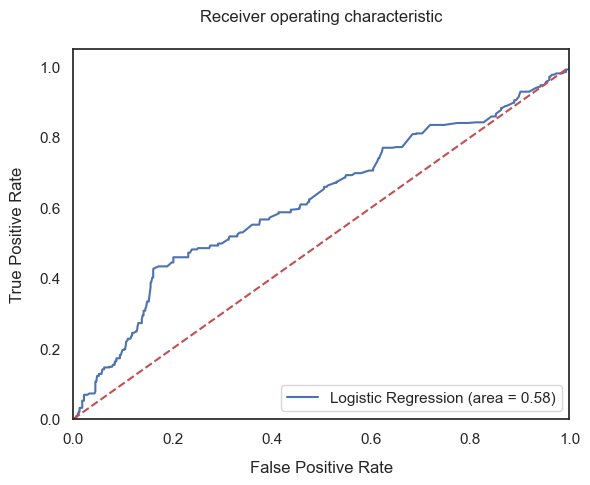

In [192]:
display_roc_curve(log_model, X_test, y_test, y_predict)

### Section Summary
> * The original dataset contained 4 tables: Categories, Podcasts, Reviews, Runs.
> * The Runs table had no valuable information for this report. I deleted it.

## Fixed Acidity


In [193]:
data = scaled_redwine_logistic

indepdent_varialble = [
    "fixed acidity",
]

dependent_variable = "quality"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
X, y = random_oversampler(X, y)
log_model, X_test, y_test, y_predict = logistic_regression_model(X, y)

### Reports

In [194]:
print_confusion_matrix(y_test, y_predict)

[[343 223]
 [227 313]]


In [195]:
print_classification_report(y_test, y_predict)

              precision    recall  f1-score   support

         0.0       0.60      0.61      0.60       566
         1.0       0.58      0.58      0.58       540

    accuracy                           0.59      1106
   macro avg       0.59      0.59      0.59      1106
weighted avg       0.59      0.59      0.59      1106



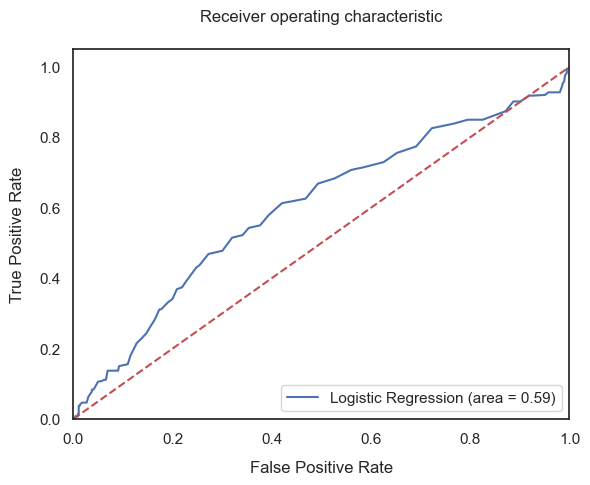

In [196]:
display_roc_curve(log_model, X_test, y_test, y_predict)

### Section Summary
> * The original dataset contained 4 tables: Categories, Podcasts, Reviews, Runs.
> * The Runs table had no valuable information for this report. I deleted it.

## Chlorides


In [197]:
data = scaled_redwine_logistic

indepdent_varialble = [
    "chlorides",
]

dependent_variable = "quality"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
X, y = random_oversampler(X, y)
log_model, X_test, y_test, y_predict = logistic_regression_model(X, y)

### Reports

In [198]:
print_confusion_matrix(y_test, y_predict)

[[190 376]
 [132 408]]


In [199]:
print_classification_report(y_test, y_predict)

              precision    recall  f1-score   support

         0.0       0.59      0.34      0.43       566
         1.0       0.52      0.76      0.62       540

    accuracy                           0.54      1106
   macro avg       0.56      0.55      0.52      1106
weighted avg       0.56      0.54      0.52      1106



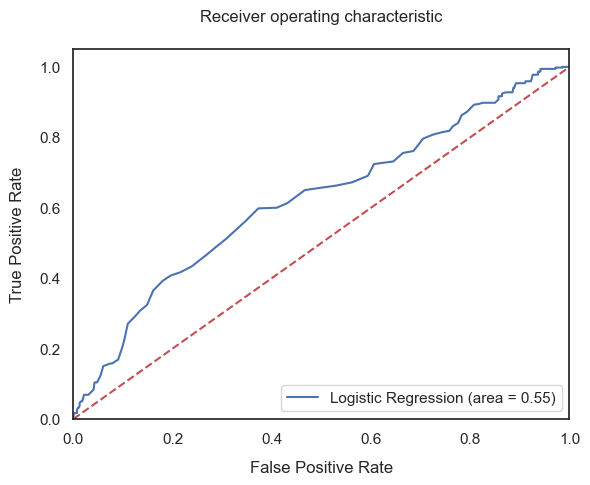

In [200]:
display_roc_curve(log_model, X_test, y_test, y_predict)

### Section Summary
> * The original dataset contained 4 tables: Categories, Podcasts, Reviews, Runs.
> * The Runs table had no valuable information for this report. I deleted it.

## Sulphates


In [201]:
data = scaled_redwine_logistic

indepdent_varialble = [
    "sulphates",
]

dependent_variable = "quality"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
X, y = random_oversampler(X, y)
log_model, X_test, y_test, y_predict = logistic_regression_model(X, y)

### Reports

In [202]:
print_confusion_matrix(y_test, y_predict)

[[404 162]
 [173 367]]


In [203]:
print_classification_report(y_test, y_predict)

              precision    recall  f1-score   support

         0.0       0.70      0.71      0.71       566
         1.0       0.69      0.68      0.69       540

    accuracy                           0.70      1106
   macro avg       0.70      0.70      0.70      1106
weighted avg       0.70      0.70      0.70      1106



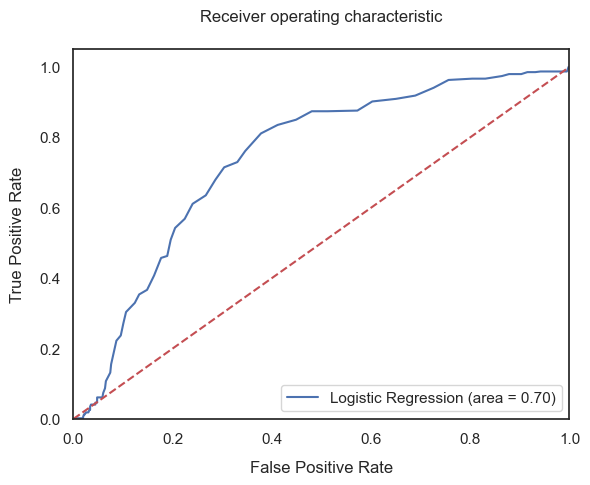

In [204]:
display_roc_curve(log_model, X_test, y_test, y_predict)

### Section Summary
> * The original dataset contained 4 tables: Categories, Podcasts, Reviews, Runs.
> * The Runs table had no valuable information for this report. I deleted it.

## Total Sulfur Dioxide

In [205]:
data = scaled_redwine_logistic

indepdent_varialble = [
    "total sulfur dioxide",
]

dependent_variable = "quality"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
X, y = random_oversampler(X, y)
log_model, X_test, y_test, y_predict = logistic_regression_model(X, y)

### Reports

In [206]:
print_confusion_matrix(y_test, y_predict)

[[240 326]
 [125 415]]


In [207]:
print_classification_report(y_test, y_predict)

              precision    recall  f1-score   support

         0.0       0.66      0.42      0.52       566
         1.0       0.56      0.77      0.65       540

    accuracy                           0.59      1106
   macro avg       0.61      0.60      0.58      1106
weighted avg       0.61      0.59      0.58      1106



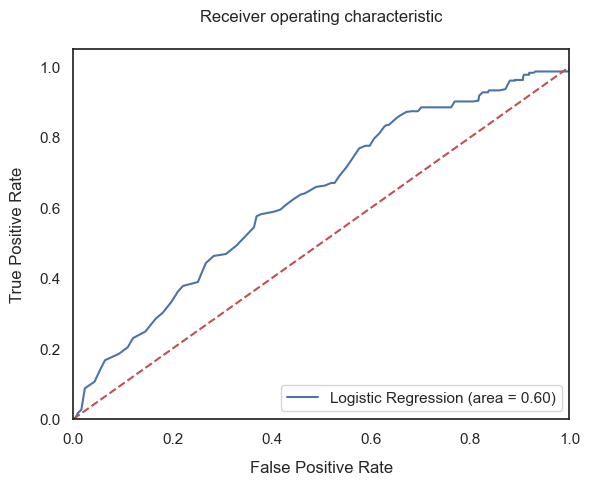

In [208]:
display_roc_curve(log_model, X_test, y_test, y_predict)

### Section Summary
> * The original dataset contained 4 tables: Categories, Podcasts, Reviews, Runs.
> * The Runs table had no valuable information for this report. I deleted it.

## Free Sulfur Dioxide

In [209]:
data = scaled_redwine_logistic

indepdent_varialble = [
    "free sulfur dioxide",
]

dependent_variable = "quality"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
X, y = random_oversampler(X, y)
log_model, X_test, y_test, y_predict = logistic_regression_model(X, y)

### Reports

In [210]:
print_confusion_matrix(y_test, y_predict)

[[220 346]
 [143 397]]


In [211]:
print_classification_report(y_test, y_predict)

              precision    recall  f1-score   support

         0.0       0.61      0.39      0.47       566
         1.0       0.53      0.74      0.62       540

    accuracy                           0.56      1106
   macro avg       0.57      0.56      0.55      1106
weighted avg       0.57      0.56      0.54      1106



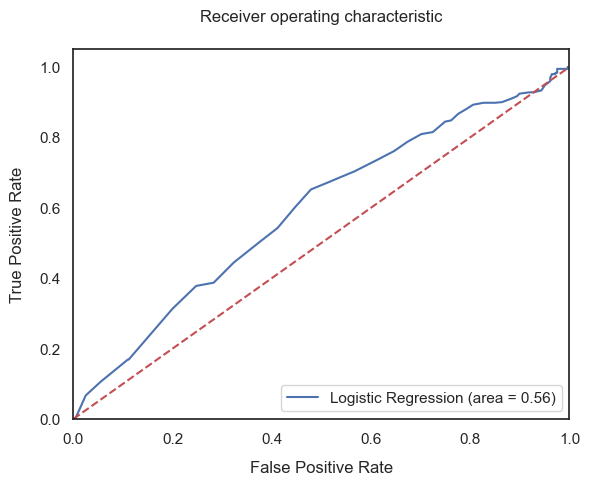

In [212]:
display_roc_curve(log_model, X_test, y_test, y_predict)

### Section Summary
> * The original dataset contained 4 tables: Categories, Podcasts, Reviews, Runs.
> * The Runs table had no valuable information for this report. I deleted it.

## Alcohol

In [213]:
data = scaled_redwine_logistic

indepdent_varialble = [
    "alcohol",
]

dependent_variable = "quality"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
X, y = random_oversampler(X, y)
log_model, X_test, y_test, y_predict = logistic_regression_model(X, y)

### Reports

In [214]:
print_confusion_matrix(y_test, y_predict)

[[396 170]
 [114 426]]


In [215]:
print_classification_report(y_test, y_predict)

              precision    recall  f1-score   support

         0.0       0.78      0.70      0.74       566
         1.0       0.71      0.79      0.75       540

    accuracy                           0.74      1106
   macro avg       0.75      0.74      0.74      1106
weighted avg       0.75      0.74      0.74      1106



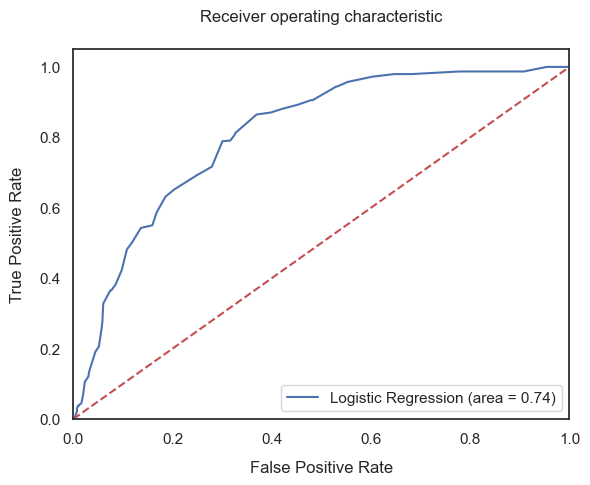

In [216]:
display_roc_curve(log_model, X_test, y_test, y_predict)

### Section Summary
> * The original dataset contained 4 tables: Categories, Podcasts, Reviews, Runs.
> * The Runs table had no valuable information for this report. I deleted it.

## pH

In [217]:
data = scaled_redwine_logistic

indepdent_varialble = [
    "pH",
]

dependent_variable = "quality"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
X, y = random_oversampler(X, y)
log_model, X_test, y_test, y_predict = logistic_regression_model(X, y)

### Reports

In [218]:
print_confusion_matrix(y_test, y_predict)

[[231 335]
 [156 384]]


In [219]:
print_classification_report(y_test, y_predict)

              precision    recall  f1-score   support

         0.0       0.60      0.41      0.48       566
         1.0       0.53      0.71      0.61       540

    accuracy                           0.56      1106
   macro avg       0.57      0.56      0.55      1106
weighted avg       0.57      0.56      0.55      1106



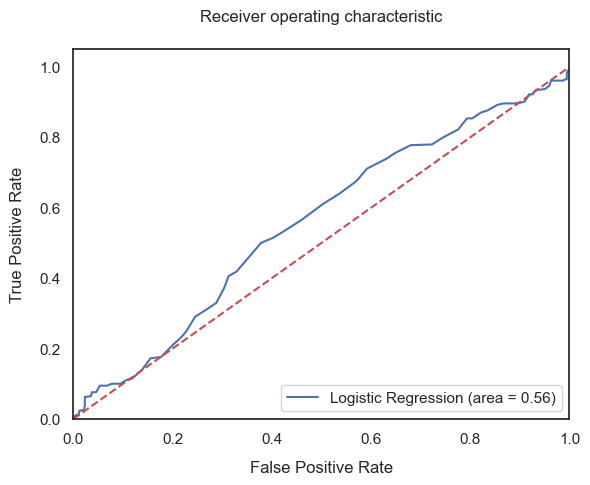

In [220]:
display_roc_curve(log_model, X_test, y_test, y_predict)

### Section Summary
> * The original dataset contained 4 tables: Categories, Podcasts, Reviews, Runs.
> * The Runs table had no valuable information for this report. I deleted it.

## Multivariant Logistic Regression

In [221]:
data = scaled_redwine_logistic

indepdent_varialble = [
    "citric acid",
    "volatile acidity",
    "residual sugar",
    "total sulfur dioxide",
    "sulphates",
    "alcohol",
]

dependent_variable = "quality"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
X, y = random_oversampler(X, y)
log_model, X_test, y_test, y_predict = logistic_regression_model(X, y)

### Reports

In [222]:
print_confusion_matrix(y_test, y_predict)

[[432 134]
 [ 96 444]]


In [223]:
print_classification_report(y_test, y_predict)

              precision    recall  f1-score   support

         0.0       0.82      0.76      0.79       566
         1.0       0.77      0.82      0.79       540

    accuracy                           0.79      1106
   macro avg       0.79      0.79      0.79      1106
weighted avg       0.79      0.79      0.79      1106



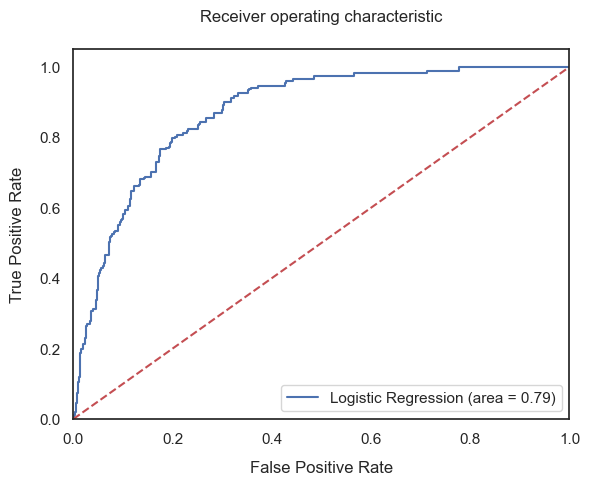

In [224]:
display_roc_curve(log_model, X_test, y_test, y_predict)

### Section Summary
> * The original dataset contained 4 tables: Categories, Podcasts, Reviews, Runs.
> * The Runs table had no valuable information for this report. I deleted it.

# Linear Regression

## Data Normalization

In [225]:
scaler = MinMaxScaler()

scaled_redwine_linear = scaler.fit_transform(redwine)
scaled_redwine_linear = pd.DataFrame(
    scaled_redwine_linear,
    columns=[
        "fixed acidity",
        "volatile acidity",
        "citric acid",
        "residual sugar",
        "chlorides",
        "free sulfur dioxide",
        "total sulfur dioxide",
        "density",
        "pH",
        "sulphates",
        "alcohol",
        "quality",
    ],
)

In [226]:
scaled_redwine_linear = scaled_redwine_linear.drop("quality", axis=1)

## Helper Functions

### Feature Columns

In [227]:
def create_varialbles(data, indepdent_varialble, dependent_variable):

    X = data[indepdent_varialble]
    y = data[dependent_variable]

    return X, y

### Linear Regression

In [228]:
def linear_regression_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, shuffle=True, test_size=0.2, random_state=0
    )
    log_model = LinearRegression()
    log_model.fit(X_train, y_train)
    y_predict = log_model.predict(X_test)

    return log_model, X_train, X_test, y_train, y_test, y_predict

### Print R Squared

In [229]:
def print_rsquared(y_test, y_predict):
    print("R Squared is: ", np.round(r2_score(y_test, y_predict), 2))

### Section Summary
> * The original dataset contained 4 tables: Categories, Podcasts, Reviews, Runs.
> * The Runs table had no valuable information for this report. I deleted it.

## Citric Acid

In [230]:
data = scaled_redwine_linear

indepdent_varialble = [
    "citric acid",
]

dependent_variable = "alcohol"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
log_model, X_train, X_test, y_train, y_test, y_predict = linear_regression_model(X, y)
print_rsquared(y_test, y_predict)

R Squared is:  0.01


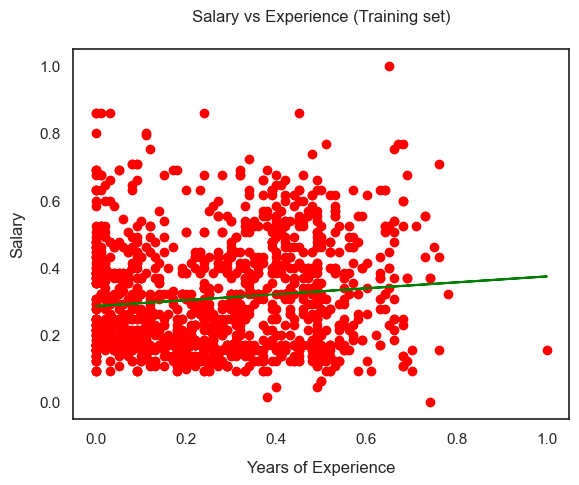

In [231]:
plt.scatter(X_train, y_train, color="red")
plt.plot(X_train, log_model.predict(X_train), color="green")
plt.title("Salary vs Experience (Training set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

### Section Summary
> * The original dataset contained 4 tables: Categories, Podcasts, Reviews, Runs.
> * The Runs table had no valuable information for this report. I deleted it.

## Density

In [232]:
data = scaled_redwine_linear

indepdent_varialble = [
    "density",
]

dependent_variable = "alcohol"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
log_model, X_train, X_test, y_train, y_test, y_predict = linear_regression_model(X, y)
print_rsquared(y_test, y_predict)

R Squared is:  0.26


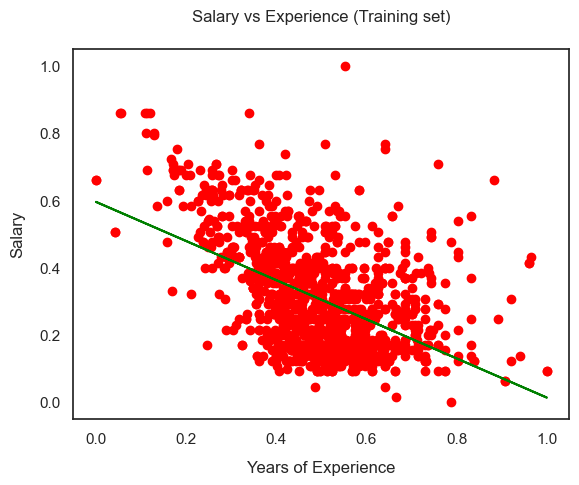

In [233]:
plt.scatter(X_train, y_train, color="red")
plt.plot(X_train, log_model.predict(X_train), color="green")
plt.title("Salary vs Experience (Training set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

### Section Summary
> * The original dataset contained 4 tables: Categories, Podcasts, Reviews, Runs.
> * The Runs table had no valuable information for this report. I deleted it.

## Fixed Acidity

In [234]:
data = scaled_redwine_linear

indepdent_varialble = [
    "fixed acidity",
]

dependent_variable = "alcohol"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
log_model, X_train, X_test, y_train, y_test, y_predict = linear_regression_model(X, y)
print_rsquared(y_test, y_predict)

R Squared is:  0.0


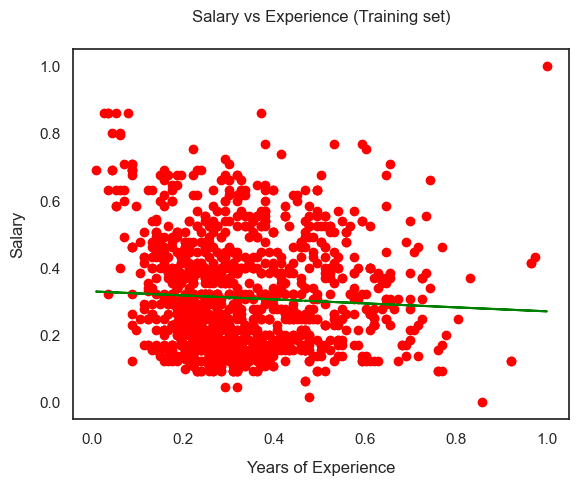

In [235]:
plt.scatter(X_train, y_train, color="red")
plt.plot(X_train, log_model.predict(X_train), color="green")
plt.title("Salary vs Experience (Training set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

### Section Summary
> * The original dataset contained 4 tables: Categories, Podcasts, Reviews, Runs.
> * The Runs table had no valuable information for this report. I deleted it.

## Sulphates

In [236]:
data = scaled_redwine_linear

indepdent_varialble = [
    "sulphates",
]

dependent_variable = "alcohol"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
log_model, X_train, X_test, y_train, y_test, y_predict = linear_regression_model(X, y)
print_rsquared(y_test, y_predict)

R Squared is:  0.0


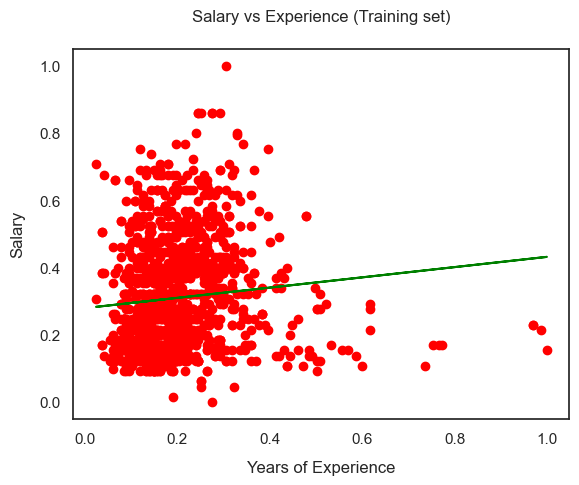

In [237]:
plt.scatter(X_train, y_train, color="red")
plt.plot(X_train, log_model.predict(X_train), color="green")
plt.title("Salary vs Experience (Training set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

### Section Summary
> * The original dataset contained 4 tables: Categories, Podcasts, Reviews, Runs.
> * The Runs table had no valuable information for this report. I deleted it.

## Chlorides

In [238]:
data = scaled_redwine_linear

indepdent_varialble = [
    "chlorides",
]

dependent_variable = "alcohol"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
log_model, X_train, X_test, y_train, y_test, y_predict = linear_regression_model(X, y)
print_rsquared(y_test, y_predict)

R Squared is:  0.07


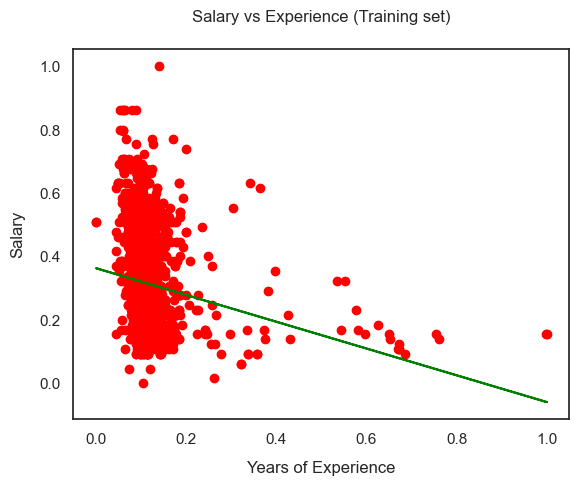

In [239]:
plt.scatter(X_train, y_train, color="red")
plt.plot(X_train, log_model.predict(X_train), color="green")
plt.title("Salary vs Experience (Training set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

### Section Summary
> * The original dataset contained 4 tables: Categories, Podcasts, Reviews, Runs.
> * The Runs table had no valuable information for this report. I deleted it.

## Total Sulfur Dioxide

In [240]:
data = scaled_redwine_linear

indepdent_varialble = [
    "total sulfur dioxide",
]

dependent_variable = "alcohol"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
log_model, X_train, X_test, y_train, y_test, y_predict = linear_regression_model(X, y)
print_rsquared(y_test, y_predict)

R Squared is:  0.03


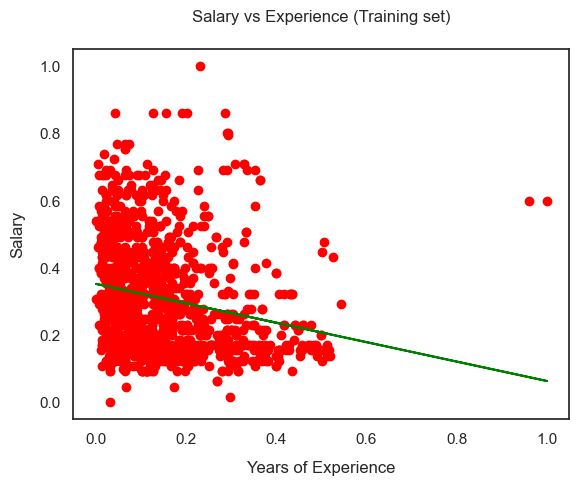

In [241]:
plt.scatter(X_train, y_train, color="red")
plt.plot(X_train, log_model.predict(X_train), color="green")
plt.title("Salary vs Experience (Training set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

### Section Summary
> * The original dataset contained 4 tables: Categories, Podcasts, Reviews, Runs.
> * The Runs table had no valuable information for this report. I deleted it.

## Free Sulfur Dioxide

In [242]:
data = scaled_redwine_linear

indepdent_varialble = [
    "free sulfur dioxide",
]

dependent_variable = "alcohol"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
log_model, X_train, X_test, y_train, y_test, y_predict = linear_regression_model(X, y)
print_rsquared(y_test, y_predict)

R Squared is:  -0.01


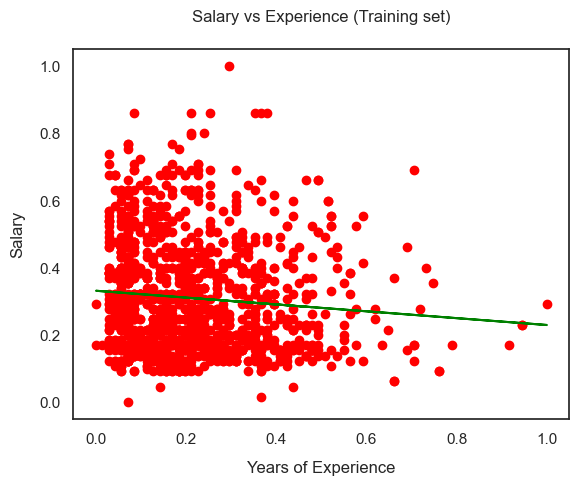

In [243]:
plt.scatter(X_train, y_train, color="red")
plt.plot(X_train, log_model.predict(X_train), color="green")
plt.title("Salary vs Experience (Training set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

### Section Summary
> * The original dataset contained 4 tables: Categories, Podcasts, Reviews, Runs.
> * The Runs table had no valuable information for this report. I deleted it.

## pH

In [244]:
data = scaled_redwine_linear

indepdent_varialble = [
    "pH",
]

dependent_variable = "alcohol"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
log_model, X_train, X_test, y_train, y_test, y_predict = linear_regression_model(X, y)
print_rsquared(y_test, y_predict)

R Squared is:  0.05


In [245]:
log_model.score(X, y)

0.042200368144411526

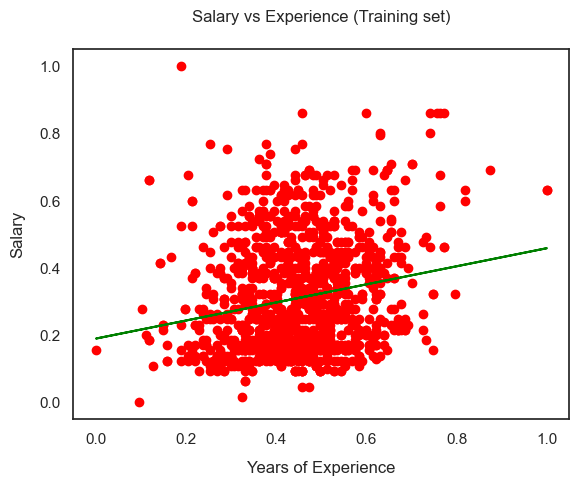

In [246]:
plt.scatter(X_train, y_train, color="red")
plt.plot(X_train, log_model.predict(X_train), color="green")
plt.title("Salary vs Experience (Training set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

### Section Summary
> * The original dataset contained 4 tables: Categories, Podcasts, Reviews, Runs.
> * The Runs table had no valuable information for this report. I deleted it.

## Multivariant Linear Regression

In [247]:
data = scaled_redwine_linear

indepdent_varialble = [
    "density",
    "volatile acidity",
    "residual sugar",
    "total sulfur dioxide",
    "chlorides",
    "pH",
]

dependent_variable = "alcohol"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
log_model, X_train, X_test, y_train, y_test, y_predict = linear_regression_model(X, y)
print_rsquared(y_test, y_predict)

R Squared is:  0.44


In [248]:
log_model.score(X, y)

0.39057466480790026

In [249]:
X_train.head()

,density,volatile acidity,residual sugar,total sulfur dioxide,chlorides,pH
642,0.663,0.288,0.096,0.120,0.098,0.512
679,0.523,0.096,0.164,0.152,0.080,0.307
473,0.516,0.158,0.082,0.028,0.083,0.409
390,0.171,0.500,0.034,0.290,0.055,0.646
1096,0.476,0.414,0.315,0.039,0.175,0.480


### Section Summary
> * The original dataset contained 4 tables: Categories, Podcasts, Reviews, Runs.
> * The Runs table had no valuable information for this report. I deleted it.

# Conclusions

In this section, I summarize the conclusions that can and cannot be drawn from this report. 

>* **Number of Reviews in this Analysis:** I analyzed the reviews of nearly 2 million reviews of about 100,000 podcasts.  <br>
>* **The Sentiments of Podcast Listeners:** This analysis showed that about 80% of reviewers were those who rated the podcast with 4 or 5 stars. This fact, makes the results of this analysis highly suspect and I can not come to a sure conclusion about the general sentiments of the podcast listener population. What about those who did not write any reviews? Were they satisfied, or dissatisfied? <br> 
>* **Recommendations for Podcast Creators:** I set the ambitious goal of being able to inform current and future podcast creators what they can do better to create more appealing podcasts. However, with this analysis, I cannot form any definitive recommendations for podcast creators.  I wanted to find words, phrases or sentences that specifically addressed issues that the reviewer liked or disliked. Instead, I found general positive and negative words that were not useful. 

# Suggestions for Improvement

This report has certain weaknesses. In this section, I outline what those weaknesses and some avenues for improvement. 

>* **Reviews:** Of the nearly 2 million reviews, over 1.5 million were from those who gave the podcast a 5-star. This report could be improved if we know more about those who did not write any reviews. Who are they? What are their thoughts? Why did they not write a review? These are important questions that need to be answered. <br>
>* **Sentiment Analysis:** This was my first experience with sentiment analysis and I found it not just a science but also an art. I experimented with various tools and methods of cleaning the text with mixed results. Learning more about this science/art will improve future reports of a similar kind. <br>
>* **Spell Corrector:** I tested various ways to correct the spelling of the reviews. My research showed that this too is both an art and a science. Learning more about this science/art will improve future reports. <br>
>* **Lemmatization:** Similar to spelling correction, I found various tools for lemmatization. None of them provided what I would call excellent results. This too seems to be both an art and a science. I hope to become better at it. <br>
>* **Lambda Functions:** I used lambda functions in several instances in this report. These functions loop through the data frame, which is much slower than using vectorization which performs multiple operations at once. This is how Panda and Numpy operations work. I will be aware of this issue in future reports.
>* **Type Hinting:** Make my functions clearer by using type hinting, to indicate the type of the variables within the functions.<br>
>* **Pandas:** I will continue to learn to utilize more optimized Pandas techniques and algorithms.<br>
>* **SQL:** I will continue to increase my knowledge of SQL and become more skilled in this language.<br>
>* **Seaborn and Matplotlib:** I will continue to improve my knowledge of Seaborn and Matplotlib for creating visualizations. <br>
>* **Python Code:** I will continue to write better and more efficient Python code. <br>
>* **Clean Code:** I will continue to adhere to the principles of writing clean code. <br>
>* **Readability and Efficiency:** I will continue to improve my skills to find the delicate balance between readability and efficiency in coding.<br>